In [ ]:

import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time

In [ ]:
cal=fetch_california_housing()
X=cal.data
y=cal.target

In [ ]:
scl=StandardScaler()
X_scl=scl.fit_transform(X)
x_b=np.c_[np.ones((X_scl.shape[0],1)),X_scl]
theta = np.random.randn(x_b.shape[1],1)

In [ ]:
lr=0.00001
n_epoch=100
loss_list=[]
acc_list=[]

In [ ]:
start = time.time()
for epoch in range(n_epoch):
  tl=0
  init_pred=0
  for i in range(len(x_b)):
    ri=np.random.randint(len(x_b))
    xi=x_b[ri:ri+1]
    yi=y[ri:ri+1]
    grad=2*xi.T.dot(xi.dot(theta)-yi)
    theta -= lr*grad
    loss=np.square(xi.dot(theta)-yi)
    tl+=loss

    if abs(xi.dot(theta)-yi) <0.5:
        init_pred += 1

  acc= init_pred/len(x_b)
  avg_loss=tl/len(x_b)

  acc_list.append(acc)
  loss_list.append(avg_loss)
end=time.time()

In [ ]:
y_pred = x_b.dot(theta)
print("Final theta:", theta)
elapsed_time = end - start
print(f"Time taken: {elapsed_time:.2f} seconds")

Final theta: [[ 2.07039328]
 [ 0.87275657]
 [ 0.13144483]
 [-0.34184681]
 [ 0.3750556 ]
 [ 0.00211434]
 [-0.04130197]
 [-0.7724449 ]
 [-0.74287073]]
Time taken: 68.32 seconds


Text(0.5, 1.0, 'True Prices vs. Pred Prices')

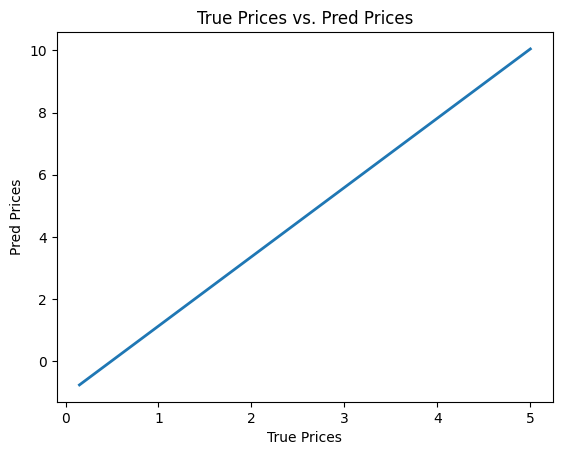

In [ ]:
plt.plot([min(y), max(y)], [min(y_pred), max(y_pred)], linewidth=2)
plt.xlabel('True Prices')
plt.ylabel('Pred Prices')
plt.title('True Prices vs. Pred Prices')